In [1]:
import pickle
import numpy
import matplotlib.pyplot as plt
import os

In [2]:
def courbe2(liste, steps_total, total_stable):
    sorted_liste = sorted(liste)
    result = []
    nb_instable = 0
    if len(sorted_liste)>0:
        current_inst = sorted_liste.pop(0)
    else:
        current_inst = steps_total+2
    for x in range(1, steps_total+1):
        while x >= current_inst:
            nb_instable += 1
            if len(sorted_liste)>0:
                current_inst = sorted_liste.pop(0)
            else:
                current_inst = steps_total+2
                break  
        #print("post x ",x," nb_inst ",nb_instable," current_inst ",current_inst," len ",len(sorted_liste))
        #print("------")
        result.append(total_stable-nb_instable)
    return result

In [3]:
def plot(all):
    plt.figure(1, figsize=(13,10))
    plt.xlabel("time steps")
    plt.ylabel("% stable")
    plt.title("Stability profiles varying delta_clip ")
    
    for delta in sorted(all.keys(),key=float):
        data = all.get(delta)
        plt.plot(courbe2(data,100000,100),label=delta)
    plt.legend()
    plt.show(block = True)       

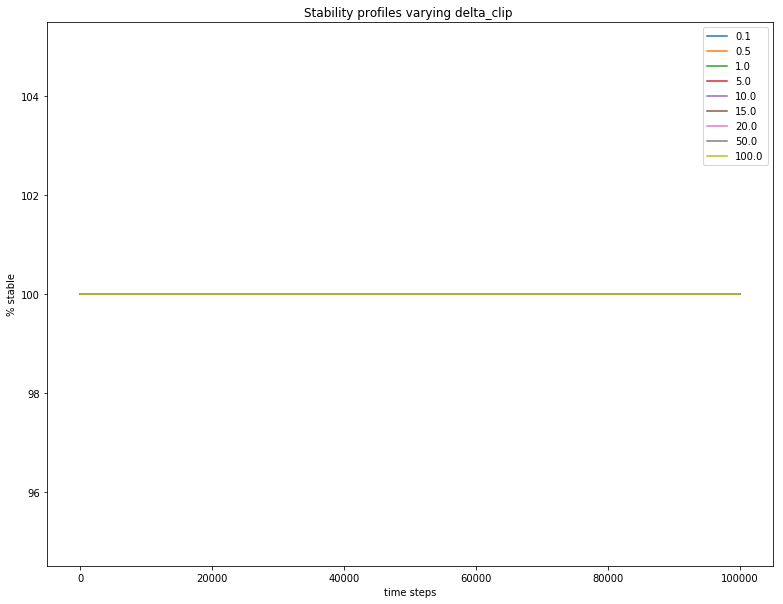

In [4]:
all_steps_termination = {}
experiment_root = "../experiments/perf/"
for delta in os.listdir(experiment_root):
    steps_termination = []
    experiment_path = experiment_root + delta + "/"
    for file in os.listdir(experiment_path):
        filename = experiment_path + file + "/data/div.p"
        if os.path.isfile(filename):
            with open(filename, "rb") as fd:
                steps_termination.append(pickle.load(fd)["steps"] - 200)
    all_steps_termination[delta] = steps_termination
plot(all_steps_termination)

In [36]:
courbe2([2, 7, 9, 3, 4, 9, 5, 4, 4, 12,12], 15, 20)

[20, 19, 18, 15, 14, 14, 13, 13, 11, 11, 11, 9, 9, 9, 9]